<a href="https://colab.research.google.com/github/siddhantjain07/SimpsonClassifierVGGM/blob/master/VGGM_Simpsons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simpsons' Classifier
Name : Siddhant Jain

Dataset : alexattia/the-simpsons-characters-dataset (Kaggle) 

Link to dataset : https://www.kaggle.com/alexattia/the-simpsons-characters-dataset/kernels

I'll call this model VGGM (M-modified) because I have used the (3x3) convolution in all layers just as VGG-16/19.

## Importing data from kaggle (optional)

In [ ]:
#Use this if you want to have data directly from Kaggle, but I personally found it tedious and instead downloaded, proccessed and used the dataset

#!pip install -q kaggle
#!mkdir ~/.kaggle
#!cp kaggle.json ~/.kaggle/
#!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#!kaggle datasets list

In [ ]:
#!kaggle datasets download -d alexattia/the-simpsons-characters-dataset

 99% 1.07G/1.08G [00:27<00:00, 49.5MB/s]
100% 1.08G/1.08G [00:28<00:00, 41.3MB/s]


In [ ]:
#!mkdir the-simpsons-characters-dataset
#!unzip the-simpsons-characters-dataset.zip -d the-simpsons-characters-dataset

##Importing requirements

In [16]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import ELU
from keras.preprocessing.image import ImageDataGenerator
import os

##Train-Val spliting & Data augmentation

In [17]:
num_classes = 20
img_rows, img_cols = 64, 64               #Let's keep the image size to 32x32
batch_size = 32

In [18]:
train_data_dir = "/content/drive/My Drive/simpsons/train"
val_data_dir = "/content/drive/My Drive/simpsons/validation"

#Augmenting data
train_data_gen = ImageDataGenerator(
    rescale = 1.0/255,
    rotation_range = 30,
    width_shift_range = 30,
    height_shift_range = 0.3,
    horizontal_flip = True,
    fill_mode = "nearest",
    )

validation_data_gen = ImageDataGenerator(rescale = 1.0/255)

train_generator = train_data_gen.flow_from_directory(
    train_data_dir,
    target_size = (img_rows, img_cols),
    batch_size = batch_size,
    class_mode = "categorical",
)

validation_generator = validation_data_gen.flow_from_directory(
    val_data_dir,
    target_size = (img_rows, img_cols),
    batch_size = batch_size,
    class_mode = "categorical",
)

Found 19548 images belonging to 20 classes.
Found 990 images belonging to 20 classes.


##Defining Model :

In [19]:
VGGMS = Sequential()

#1st CONV-ReLU Layer
VGGMS.add(Conv2D(64, (3,3), padding= "same", input_shape = (img_rows, img_cols, 3)))
VGGMS.add(Activation("relu"))
VGGMS.add(BatchNormalization())

#2nd CONV-ReLU Layer
VGGMS.add(Conv2D(64, (3,3), padding= "same", input_shape = (img_rows, img_cols, 3)))
VGGMS.add(Activation("relu"))
VGGMS.add(BatchNormalization())

#Max Pooling with Dropout
VGGMS.add(MaxPooling2D(pool_size = (2,2)))
VGGMS.add(Dropout(0.2))



#3rd CONV-ReLU Layer
VGGMS.add(Conv2D(128, (3,3), padding="same"))
VGGMS.add(Activation("relu"))
VGGMS.add(BatchNormalization())

#4th CONV-ReLU Layer
VGGMS.add(Conv2D(128, (3,3), padding="same"))
VGGMS.add(Activation("relu"))
VGGMS.add(BatchNormalization())

#Max Pooling with Dropout
VGGMS.add(MaxPooling2D(pool_size = (2,2)))
VGGMS.add(Dropout(0.2))




#5th CONV-ReLU Layer
VGGMS.add(Conv2D(256, (3,3), padding="same"))
VGGMS.add(Activation("relu"))
VGGMS.add(BatchNormalization())

#6th CONV-ReLU Layer
VGGMS.add(Conv2D(256, (3,3), padding="same"))
VGGMS.add(Activation("relu"))
VGGMS.add(BatchNormalization())

#Max Pooling with Dropout
VGGMS.add(MaxPooling2D(pool_size = (2,2)))
VGGMS.add(Dropout(0.2))







#Set-1 Dense Layer
VGGMS.add(Flatten())
VGGMS.add(Dense(256))
VGGMS.add(Activation("relu"))
VGGMS.add(BatchNormalization())
VGGMS.add(Dropout(0.4))

#Set-2 Dense Layer
VGGMS.add(Dense(256))
VGGMS.add(Activation("relu"))
VGGMS.add(BatchNormalization())
VGGMS.add(Dropout(0.4))

#Final Dense Layer
VGGMS.add(Dense(num_classes))
VGGMS.add(Activation("softmax"))

print(VGGMS.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 64, 64, 64)        1792      
_________________________________________________________________
activation_10 (Activation)   (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
activation_11 (Activation)   (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 64)       

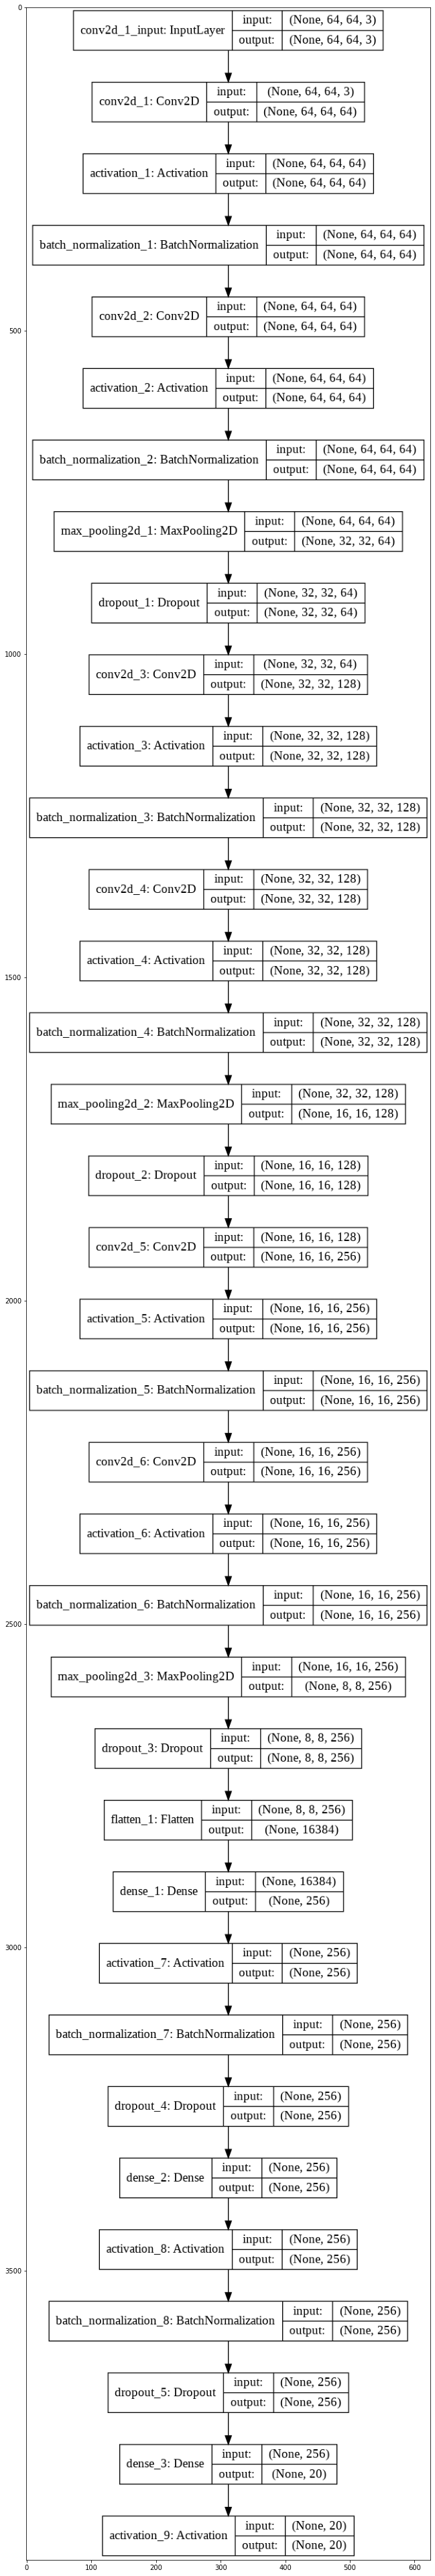

In [ ]:
import keras
from keras.models import Sequential 
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

plot_model(VGGMS, to_file="VGGMS.png", show_shapes=True, show_layer_names=True)
img = mpimg.imread("VGGMS.png")
plt.figure(figsize = (100,70))
imgplot = plt.imshow(img)

##Training the VGGM model

In [32]:
from keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("VGGM_Simpsons.h5", 
                             monitor = "val_loss",
                             mode = "min",
                             save_best_only = True,
                             verbose = 1)

earlystop = EarlyStopping(monitor = "val_loss",
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = "val_loss",
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.00001)

callbacks = [earlystop, checkpoint, reduce_lr]

VGGMS.compile(loss = "categorical_crossentropy",
              optimizer = Adam(lr = 0.01),
              metrics = ["accuracy"])

nb_train_samples = 19548
nb_validation_samples = 990
epochs = 50

history = VGGMS.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

Epoch 1/50
610/610 [==============================] - 108s 177ms/step - loss: 0.5754 - accuracy: 0.8422 - val_loss: 0.4301 - val_accuracy: 0.9042

Epoch 00001: val_loss improved from inf to 0.43008, saving model to VGGM_Simpsons.h5
Epoch 2/50
610/610 [==============================] - 107s 175ms/step - loss: 0.5479 - accuracy: 0.8480 - val_loss: 0.5388 - val_accuracy: 0.9113

Epoch 00002: val_loss did not improve from 0.43008
Epoch 3/50
610/610 [==============================] - 106s 173ms/step - loss: 0.5237 - accuracy: 0.8551 - val_loss: 0.1244 - val_accuracy: 0.9363

Epoch 00003: val_loss improved from 0.43008 to 0.12443, saving model to VGGM_Simpsons.h5
Epoch 4/50
610/610 [==============================] - 104s 171ms/step - loss: 0.5301 - accuracy: 0.8544 - val_loss: 0.1865 - val_accuracy: 0.8841

Epoch 00004: val_loss did not improve from 0.12443
Epoch 5/50
610/610 [==============================] - 104s 171ms/step - loss: 0.5098 - accuracy: 0.8584 - val_loss: 0.3569 - val_accurac

##Analyzing performance

Found 990 images belonging to 20 classes.
Confusion Matrix
[[46  1  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 49  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  1  2 38  0  0  0  0  0  1  0  0  0  0  0  1  1  0  4  0]
 [ 0  0  0  0 47  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [ 1  2  0  0  0 42  0  0  0  0  0  0  0  1  0  1  0  1  1  0]
 [ 0  2  0  0  0  0 47  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 1  1  0  1  0  0  0 45  0  0  1  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0 48  0  0  0  0  0  0  0  0  0  2  0]
 [ 1  0  0  0  0  0  0  0  0 49  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0 49  0  0  0  0  0  0  0  0  0]
 [ 0  2  1  0  0  0  0  0  0  0  0 47  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  1  0  0  0  0 46  0  0  1  1  0  0  0]
 [ 0  0  0  0  0  1  0  0  1  0  0  0  0 39  0  1  2  4  1  1]
 [ 0  2  0  0  0  0  0  0  0  0  0  0  1  0 46  0  0  0  0 

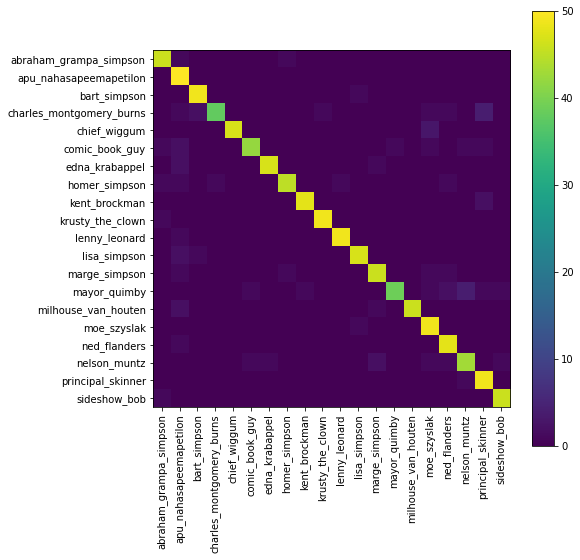

In [35]:
import matplotlib.pyplot as plt
import sklearn 
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

validation_generator = validation_data_gen.flow_from_directory(
    val_data_dir,
    target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False
        )

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

nb_train_samples = 19548
nb_validation_samples = 990

#Confution Matrix and Classification Report
Y_pred = VGGMS.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

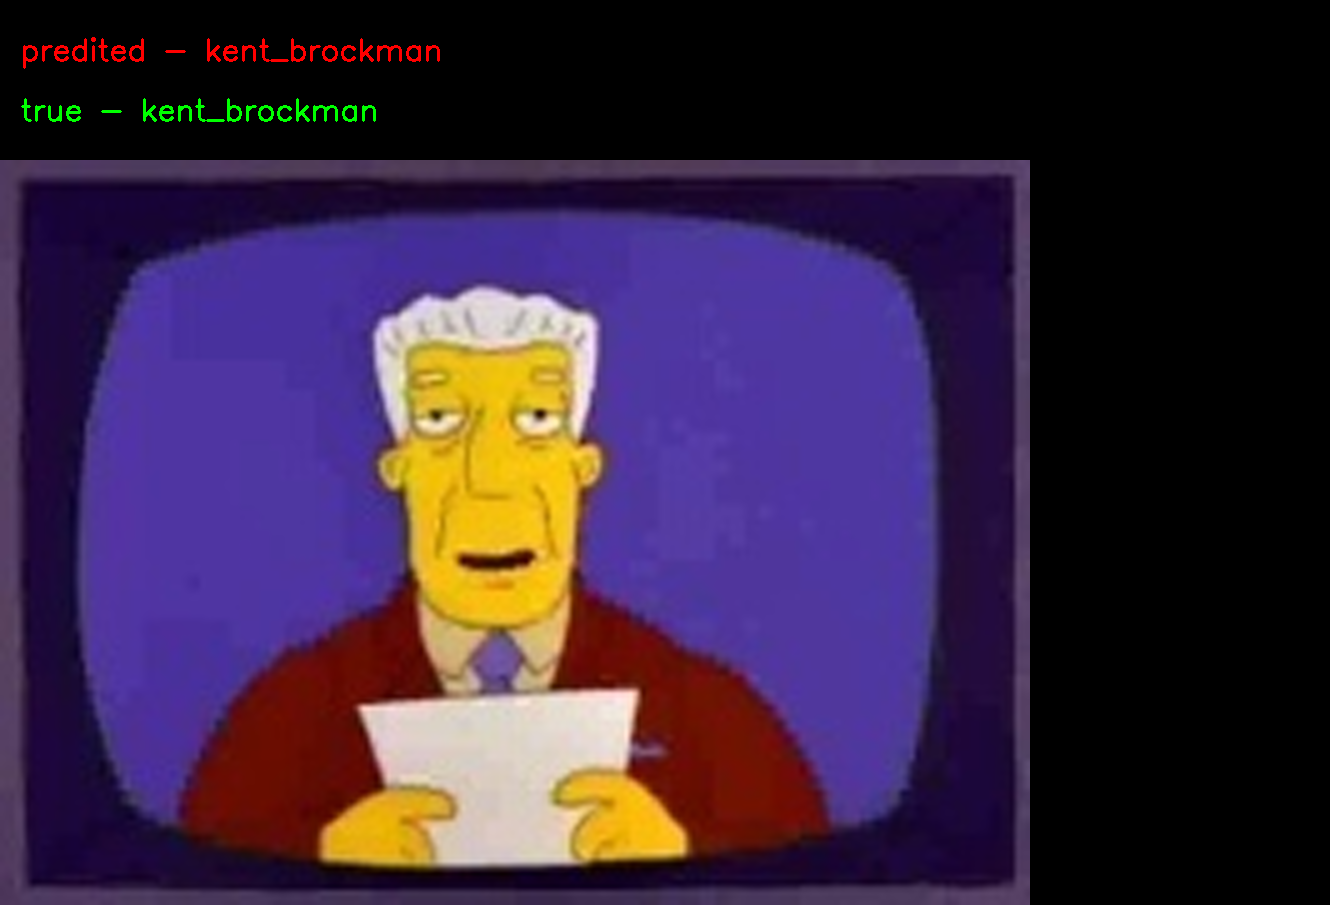

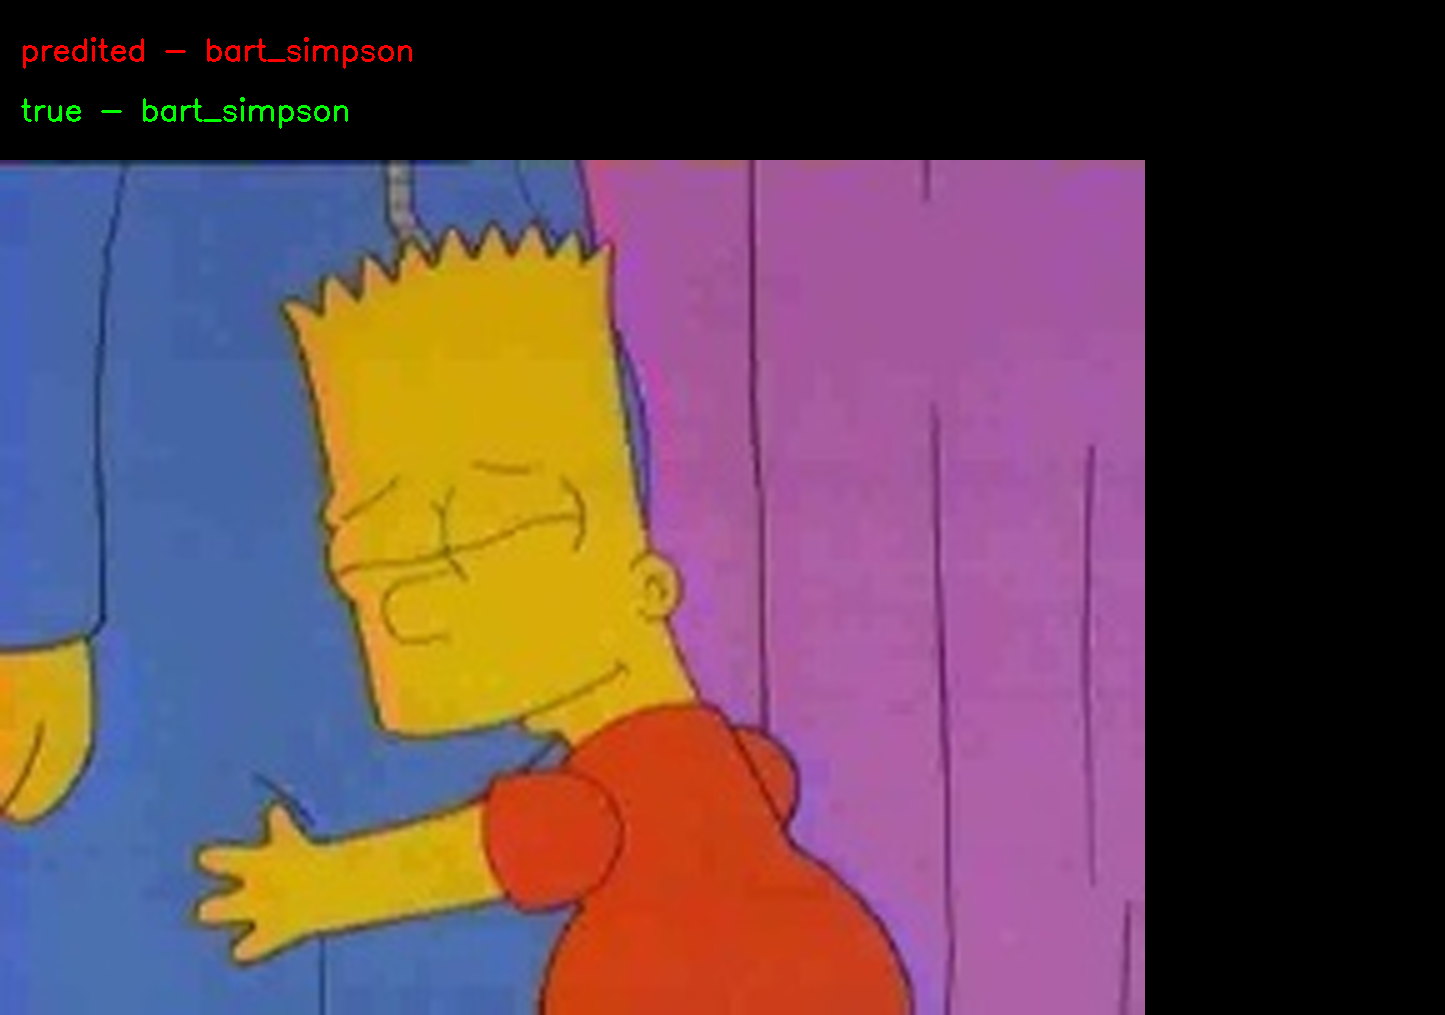

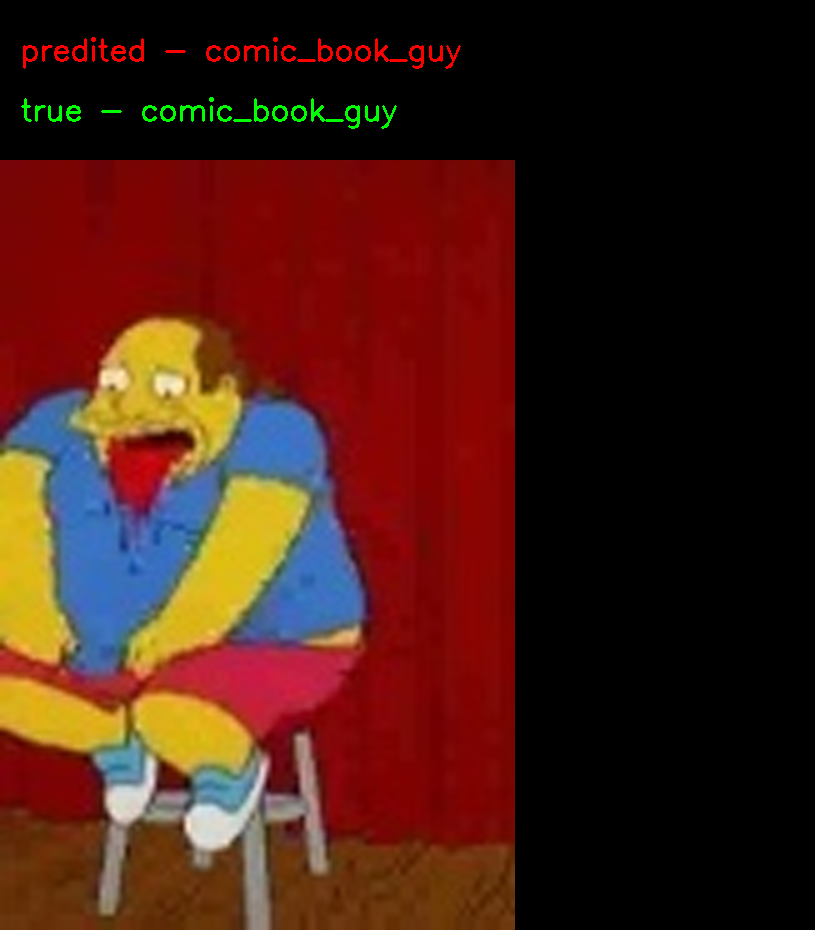

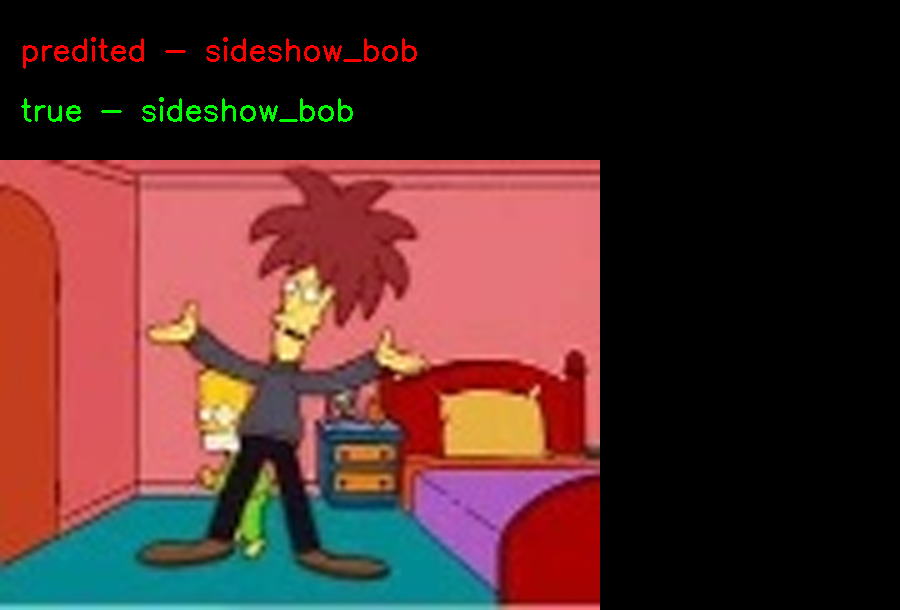

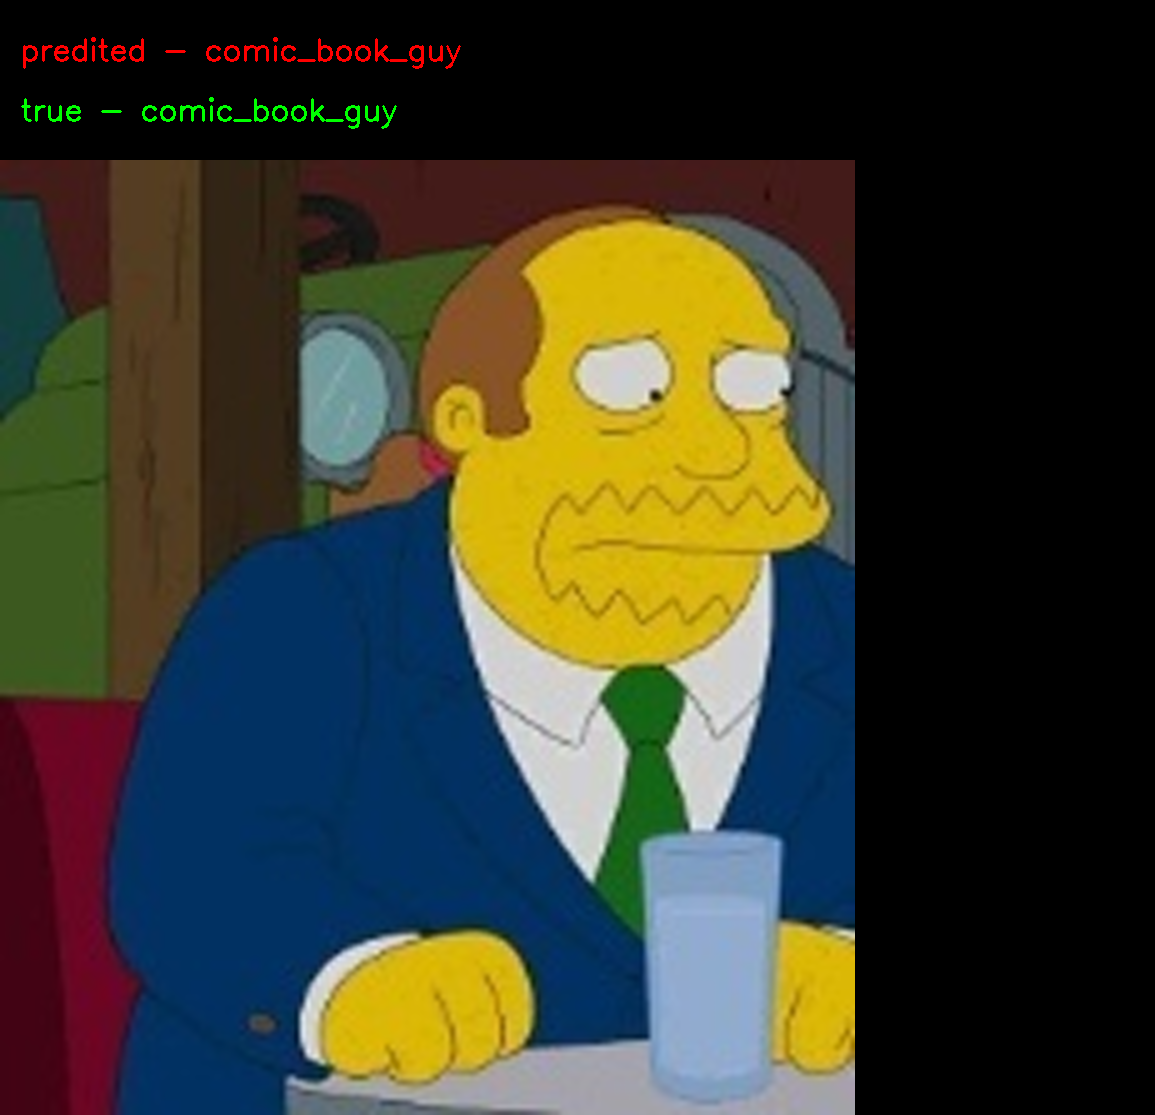

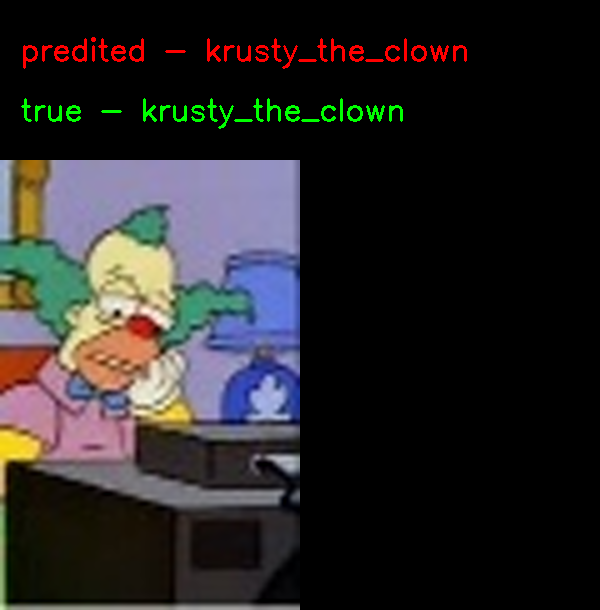

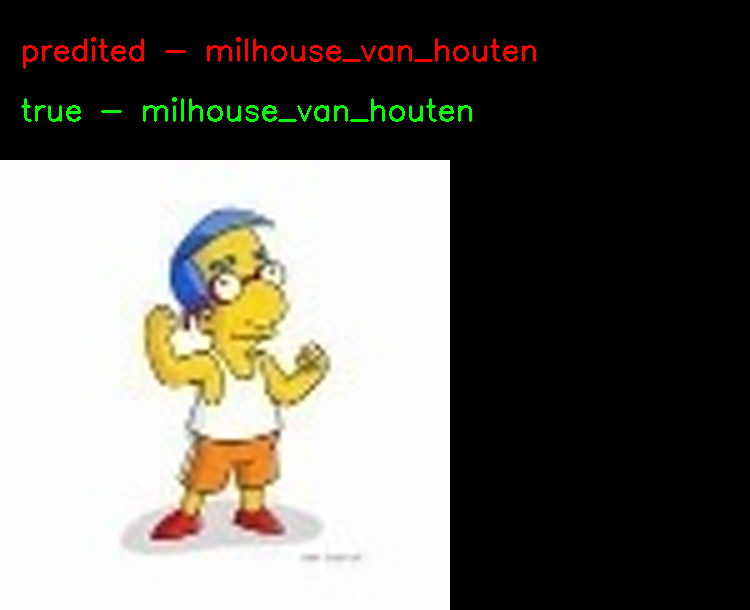

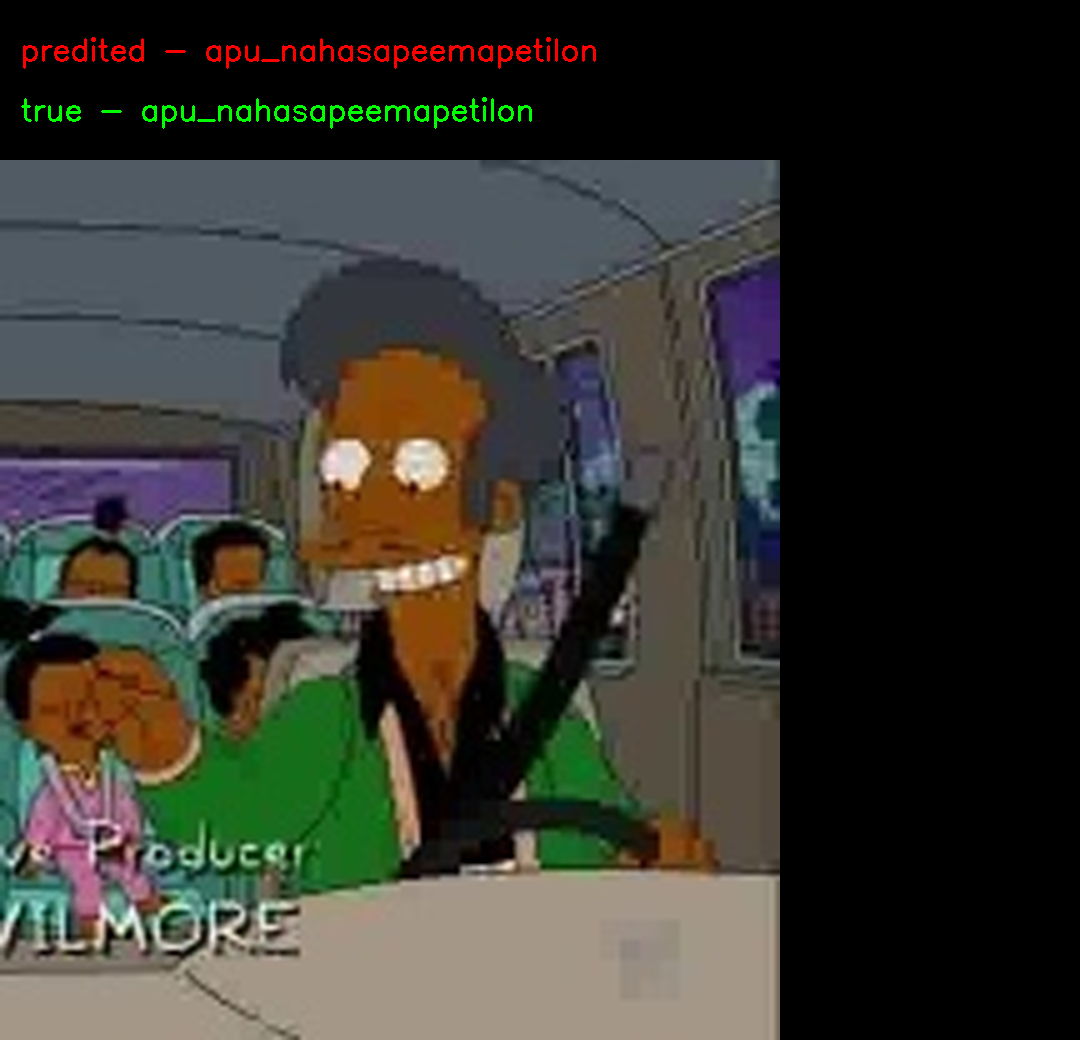

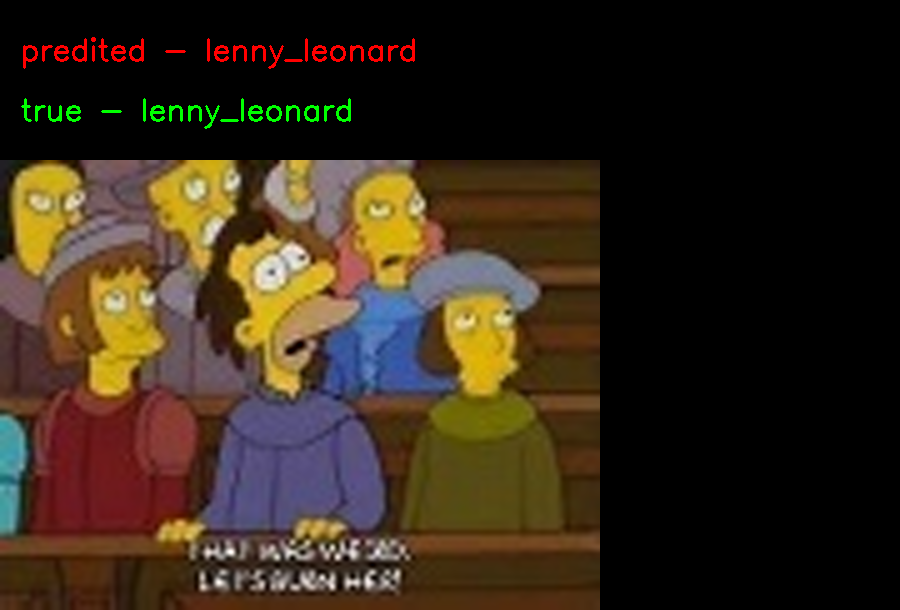

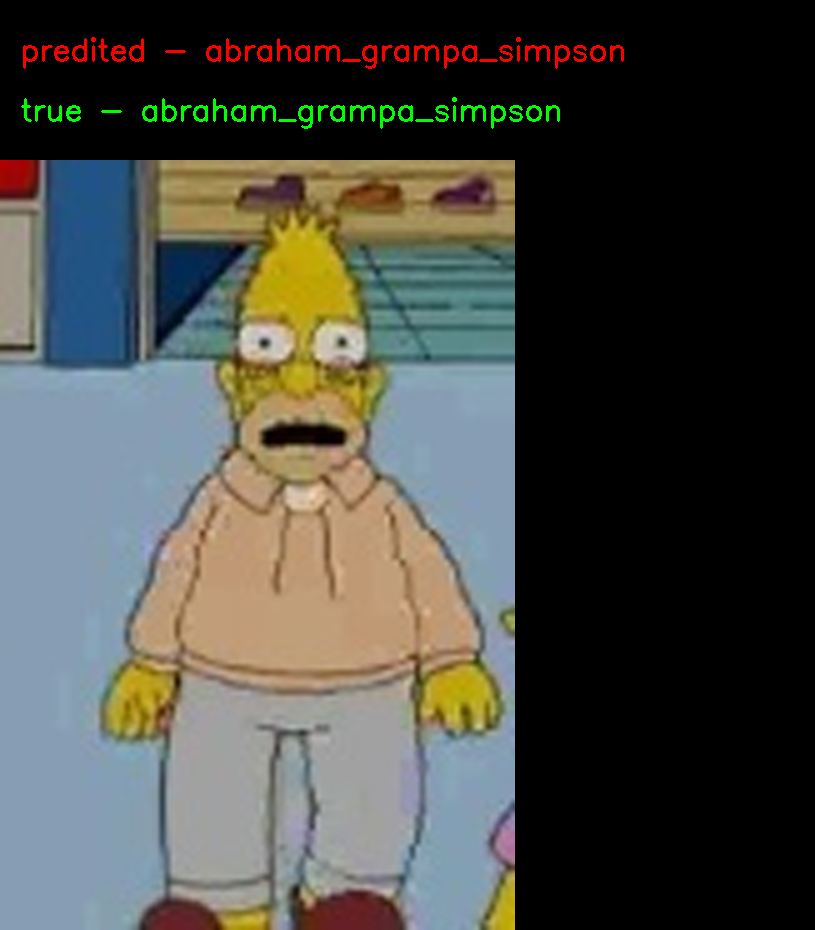

In [51]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from os import listdir
from os.path import isfile, join
import re

def draw_test(name, pred, im, true_label):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 160, 0, 0, 300 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, "predited - "+ pred, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2.putText(expanded_image, "true - "+ true_label, (20, 120) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2)
    cv2_imshow(expanded_image)
    

def getRandomImage(path, img_width, img_height):
    #function loads a random images from a random folder in our test path
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    final_path = file_path + "/" + image_name
    return image.load_img(final_path, target_size = (img_width, img_height)), final_path, path_class

# dimensions of our images
img_width, img_height = 64, 64

files = []
predictions = []
true_labels = []

# predicting images
for i in range(0, 10):
    path = '/content/drive/My Drive/simpsons/validation/' 
    img, final_path, true_label = getRandomImage(path, img_width, img_height)
    files.append(final_path)
    true_labels.append(true_label)
    x = image.img_to_array(img)
    x = x * 1./255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = VGGMS.predict_classes(images, batch_size = 10)
    predictions.append(classes)
    
for i in range(0, len(files)):
    image = cv2.imread((files[i]))
    image = cv2.resize(image, None, fx=5, fy=5, interpolation = cv2.INTER_CUBIC)
    draw_test("Prediction", class_labels[predictions[i][0]], image, true_labels[i])
    cv2.waitKey(0)

cv2.destroyAllWindows()